In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import datetime

# Exam 1 - Coding Portion

In this section, please answer the following questions and show your work in the notebook. For each response, please check carefully what it asks, and give a response matching that. Also, please clean it up a bit so things are readable, I should be able to find what you found and follow. 

Grading breakdown:
<ul>
<li> Can I read and follow this code? 5 points. </li>
<li> Q1 - Generalize to population - 5 points. </li>
<li> Q2 - Correlation - 3 points. </li>
<li> Q3 - Multiple Groups - 5 points. </li>
<li> Q4 - Store Problem - 7 points. </li>
</ul>

Other than what's specifically instructed, you can use/import pretty much anything and take any approach you want. Just be sure to explain what you're doing and why, and make it clear what your final answers are.

## Submission

To submit, just commit and push your changes to your GitHub repository, as normal. There's no auotmated testing or anything, if yours is visible online on the repository page, you're good. 

## Data Preparation - Don't Edit This Section

In [3]:
data_uae = pd.read_csv("data/uae_real_estate_2024.csv")
data_uae = data_uae[data_uae['price'] <= 5000000]
data_uae['verified'] = data_uae['verified'].astype(bool)


data_uae["sq_ft"] = data_uae["sizeMin"].apply(lambda x: int(x.split(" ")[0].replace(",", "")) if pd.notnull(x) else np.nan)
data_uae["description_length"] = data_uae["description"].apply(lambda x: len(x) if pd.notnull(x) else 0)
data_uae["log_price"] = np.log(data_uae["price"])
data_uae.head()


data_uae.head()

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description,sq_ft,description_length,log_price
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...,1323,1272,14.731801
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...,2324,1102,15.096444
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647 sqft,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...,1647,1025,14.914123
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105 sqft,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...,2105,1026,14.711598
6,High Floor | Motivated Seller | Full Marina View,"Vida Residences Dubai Marina, Dubai Marina, Dubai",3,2,2024-08-16T05:03:07Z,Residential for Sale,4980000,True,sell,1095 sqft,NO,Property Features:\n* 2 Bedrooms\n* Unfurnishe...,1095,1286,15.420940


In [4]:
data_uae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 5057
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3961 non-null   object 
 1   displayAddress      3961 non-null   object 
 2   bathrooms           3882 non-null   object 
 3   bedrooms            3881 non-null   object 
 4   addedOn             3961 non-null   object 
 5   type                3961 non-null   object 
 6   price               3961 non-null   int64  
 7   verified            3961 non-null   bool   
 8   priceDuration       3961 non-null   object 
 9   sizeMin             3961 non-null   object 
 10  furnishing          3959 non-null   object 
 11  description         3961 non-null   object 
 12  sq_ft               3961 non-null   int64  
 13  description_length  3961 non-null   int64  
 14  log_price           3961 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(10)
memory usage: 4

## Price of Population

Our data has a sample of real estate listings in the UAE. Use this sample to estimate the mean price as well as a 95% confidence interval for the mean price of all real estate listings in the UAE.

<b>If needed, use a value of 875000 for the population count of number of homes in the UAE.</b>

In [5]:
# Generalize 
meanPrice = data_uae['price'].mean()
print ('mean price:', meanPrice)


mean price: 2028387.5334511488


In [6]:
import thinkstats2
cdf = thinkstats2.Cdf(data_uae['price'])
ci = cdf.Percentile(2.5), cdf.Percentile(97.5)
print(ci[0], ci[1]) # 95% confidence interval

450000 4700000


## Show the Correlation Between Bedrooms and Bathrooms

This may require data preparation.

<b> State your answer, anlong with a statement of what it means in reality. (e.g. if I see correlation of .02 between 'shoe size' and 'IQ', I would say that the two appear to be unrelated, and knowing one tells us nothing about the other)</b>

In [7]:
data_uae = data_uae.dropna()
data_uae.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3877 entries, 0 to 5057
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3877 non-null   object 
 1   displayAddress      3877 non-null   object 
 2   bathrooms           3877 non-null   object 
 3   bedrooms            3877 non-null   object 
 4   addedOn             3877 non-null   object 
 5   type                3877 non-null   object 
 6   price               3877 non-null   int64  
 7   verified            3877 non-null   bool   
 8   priceDuration       3877 non-null   object 
 9   sizeMin             3877 non-null   object 
 10  furnishing          3877 non-null   object 
 11  description         3877 non-null   object 
 12  sq_ft               3877 non-null   int64  
 13  description_length  3877 non-null   int64  
 14  log_price           3877 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(10)
memory usage: 4

In [8]:
print(data_uae['bathrooms'])
print(data_uae['bedrooms'])
print('spearman:', thinkstats2.SpearmanCorr(data_uae['bedrooms'], data_uae['bathrooms']))

0       3
2       3
3       3
4       3
6       3
       ..
5053    3
5054    2
5055    5
5056    2
5057    5
Name: bathrooms, Length: 3877, dtype: object
0       2
2       4
3       2
4       3
6       2
       ..
5053    2
5054    1
5055    4
5056    2
5057    4
Name: bedrooms, Length: 3877, dtype: object
spearman: 0.2575001979312151


### Bathrooms and bedrooms have no strong correlation. Used spearmann in case of outliers.

## Multiple Groups

Based on this data, do any of the groups (furnished, unfurnished, or partially furnished) appear to be different in terms of price per square foot? State your answer and show evidence to support your answer.

In [9]:
data_uae['furnishing'].value_counts()

furnishing
NO        2722
YES        804
PARTLY     351
Name: count, dtype: int64

In [14]:
furnished = data_uae[data_uae['furnishing']=='YES']
unfurnished = data_uae[data_uae['furnishing']=='NO']
partly = data_uae[data_uae['furnishing']=='PARTLY']

In [11]:
# Go
furnished.describe(), unfurnished.describe(), partly.describe()

(              price        sq_ft  description_length   log_price
 count  8.040000e+02   804.000000          804.000000  804.000000
 mean   1.847411e+06  1029.582090         1281.871891   14.211872
 std    1.192710e+06   683.726814          315.067598    0.677652
 min    2.500000e+05    82.000000           99.000000   12.429216
 25%    8.500000e+05   558.500000         1046.750000   13.652992
 50%    1.500000e+06   838.500000         1231.500000   14.220976
 75%    2.600000e+06  1291.250000         1472.000000   14.771022
 max    5.000000e+06  6500.000000         2812.000000   15.424948,
               price         sq_ft  description_length    log_price
 count  2.722000e+03   2722.000000         2722.000000  2722.000000
 mean   2.120416e+06   1535.904482         1283.159442    14.371344
 std    1.229076e+06   1129.316467          325.806652     0.664180
 min    1.000000e+05    293.000000          126.000000    11.512925
 25%    1.050000e+06    771.000000         1047.000000    13.8643

In [12]:
data_uae['priceSquareFoot'] = data_uae['price']/data_uae['sq_ft']
data_uae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3877 entries, 0 to 5057
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3877 non-null   object 
 1   displayAddress      3877 non-null   object 
 2   bathrooms           3877 non-null   object 
 3   bedrooms            3877 non-null   object 
 4   addedOn             3877 non-null   object 
 5   type                3877 non-null   object 
 6   price               3877 non-null   int64  
 7   verified            3877 non-null   bool   
 8   priceDuration       3877 non-null   object 
 9   sizeMin             3877 non-null   object 
 10  furnishing          3877 non-null   object 
 11  description         3877 non-null   object 
 12  sq_ft               3877 non-null   int64  
 13  description_length  3877 non-null   int64  
 14  log_price           3877 non-null   float64
 15  priceSquareFoot     3877 non-null   float64
dtypes: bool(1),

In [16]:
furnished = data_uae[data_uae['furnishing']=='YES']
unfurnished = data_uae[data_uae['furnishing']=='NO']
partly = data_uae[data_uae['furnishing']=='PARTLY']

In [15]:
print(furnished['priceSquareFoot'].mean(), unfurnished['priceSquareFoot'].mean(), partly['priceSquareFoot'].mean())
print(furnished['priceSquareFoot'].median(), unfurnished['priceSquareFoot'].median(), partly['priceSquareFoot'].median())

1922.9739487636602 1593.9422639239879 1430.4087324327159
1648.3581734856534 1421.0500793205451 1275.2200825309492


### As expected, furnished group has mean and median prices way above the unfurnished and partly furnished but we want to check if unfurnished and partly furnished are the same or different since they are not as far from one another as they are both from furnished prices.

In [18]:
stat, pval = ss.ttest_ind(unfurnished['priceSquareFoot'], partly['priceSquareFoot'], alternative="greater")
pval

np.float64(8.297073970821604e-05)

### the p-value for partly and unfurnished is very small. I'd say their prices are really different then and the null hypothesis of them being the same be rejected. This shows that it's even more unlikely that the furnished group vary from the other two price groups just by chance since its mean and median differ from the groups by a wider margin.

## Store

In this scenario, we are looking to puchase a small retail store, but don't want to do so unless we project to make a profit within the first year.

This store is run by a real nerd, so they gave us some statistical data for us to estimate (the exact values are in the code cell below as variables):
<ul>
<li> The number of customers per day is described by a Poisson distribution with a rate of <b><i>customers_per_day</i></b> customers per day.</li>
<li> The buy rate (the percentage of customers that make a purchase) is <b><i>buy_rate</i></b>.</li>
<li> The amount each customer spends is described by a normal distribution with a mean of <b><i>mean_purchase_per_buyer</i></b> and a standard deviation of <b><i>std_dev_purchase_per_buyer</i></b>.</li>
<li> Each day, we need to take in at least <b><i>minimum_daily_income</i></b> to cover costs - to make it a 'good day'.</li>
<li> In a given year (we open every day), we must have over <b><i>good_day_minimum_count</i></b> good days for the year to be a success.</li>
</ul>

To determine if the store is a good investment, we will simulate the daily sales over the course of a year and see how often we meet or exceed the <b><i>minimum_daily_income</i></b> threshold. <b> Demonstrate how comfortable you are with the statement "we express this store to be a success", and show why in your calculations.</b> This is not something with one specific answer, there are many details that may vary somewhat. If it is hard, I recommend starting with a very simple model - can you simulate one customer? Can we simulate one day of customers? Can we simulate one year of days? <b>Build a simple model and make it more accurate incrementally</b>, doing it all at once can be hard, doing it piece by piece is easier. 

<b>Overall, for grades, this will be roughly logarithmicly evaluated - if you get something ok, you'll get points. The better it is the more points, but as you go up, the curve flattens. The most value is in getting a simple, working version. </b>

<b>tl;dr:</b> We have a store with customers and purchases defined by these distributions. Simulate a year of operations and deterimine the number of dayas in that year the store made over the cutoff - if it did, that's a success, if not, it's a failure. 

In [21]:
customers_per_day = 200
buy_rate = 0.22
mean_purchase_per_buyer = 125
stddev_purchase_per_buyer = 30
minimum_daily_income = 4000

good_day_minimum_rate = .10
good_day_minimum_count = 365 - (int(365 * good_day_minimum_rate))

# Get simulating!


### we'll count it as a win if the sales in a day exceed the given minimum_daily_income threshold. So if the good day minimum count is exceeded, we'll be confident that the store is a success.

In [23]:
def SimGame(lam):
    dist = ss.poisson(lam)
    score = dist.rvs(1)
    return score[0]

In [30]:
lam = customers_per_day 
score = SimGame(lam)
print(score)

204


In [31]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [46]:
import thinkplot
def estimateGame(lam=customers_per_day, m=365):
    estimates = []
    for i in range(m):
        L = SimGame(lam)
        estimates.append(L)

    print('customer distro:')
    print('rmse customer:', RMSE(estimates, lam))
    print('mean error customer:', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='number of customers', ylabel='PMF')
    return estimates

customer distro:
rmse customer: 14.662224316856165
mean error customer: 0.9972602739726028


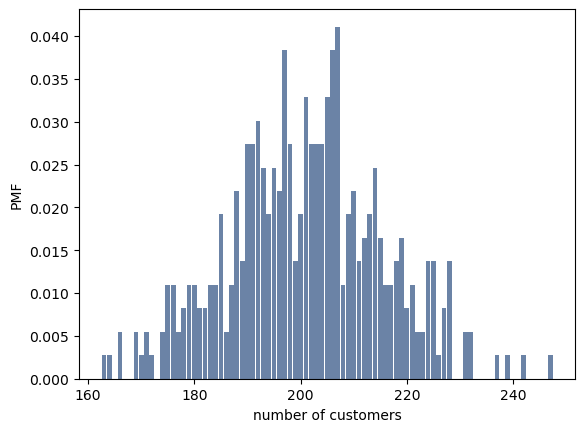

In [48]:
estimates= estimateGame(lam=customers_per_day, m=365) # number of customers in a day

### this is 

In [ ]:
#

<Axes: ylabel='Count'>

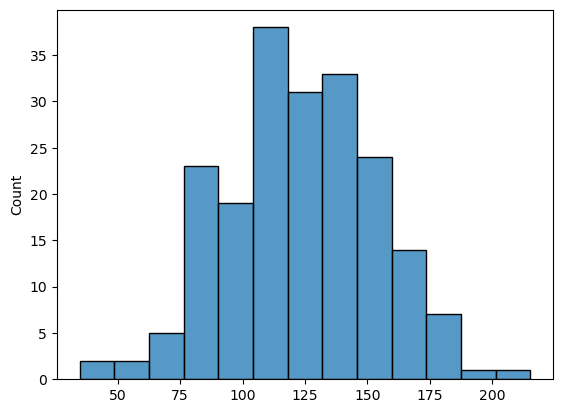

In [ ]:
purchaseperbuyer = np.random.normal(size = 200, loc = 125, scale = 30) # purchaseperbuyer per day
sns.histplot(purchaseperbuyer)

In [1]:
print('purchaseperbuyer')

purchaseperbuyer
